In [ ]:
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data["v1"] = data["v1"].map({"spam": 0, "ham": 1})

In [ ]:
features = data["v2"]
labels = data["v1"]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
SVM = make_pipeline(tfidf_vectorizer, SVC(kernel='linear', probability=True))
SVM.fit(X_train, y_train)
svm_predictions = SVM.predict(X_test)

In [ ]:
NB = make_pipeline(tfidf_vectorizer, MultinomialNB())
NB.fit(X_train, y_train)
nb_predictions = NB.predict(X_test)

In [ ]:
LR = make_pipeline(tfidf_vectorizer, LogisticRegression())
LR.fit(X_train, y_train)
lr_predictions = LR.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)
svm_fpr, svm_tpr, _ = roc_curve(y_test, SVM.predict_proba(X_test)[:, 1])
svm_auc = auc(svm_fpr, svm_tpr)

In [ ]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1_score = f1_score(y_test, nb_predictions)
nb_fpr, nb_tpr, _ = roc_curve(y_test, NB.predict_proba(X_test)[:, 1])
nb_auc = auc(nb_fpr, nb_tpr)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
lr_fpr, lr_tpr, _ = roc_curve(y_test, LR.predict_proba(X_test)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

In [ ]:
print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1_score:.2f}")
print(f"AUC: {svm_auc:.2f}")

SVM Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 1.00
F1 Score: 0.99
AUC: 0.99


In [ ]:
print("\nNaive Bayes Metrics:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1_score:.2f}")
print(f"AUC: {nb_auc:.2f}")


Naive Bayes Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
AUC: 0.98


In [ ]:
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1_score:.2f}")
print(f"AUC: {lr_auc:.2f}")


Logistic Regression Metrics:
Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
AUC: 0.98


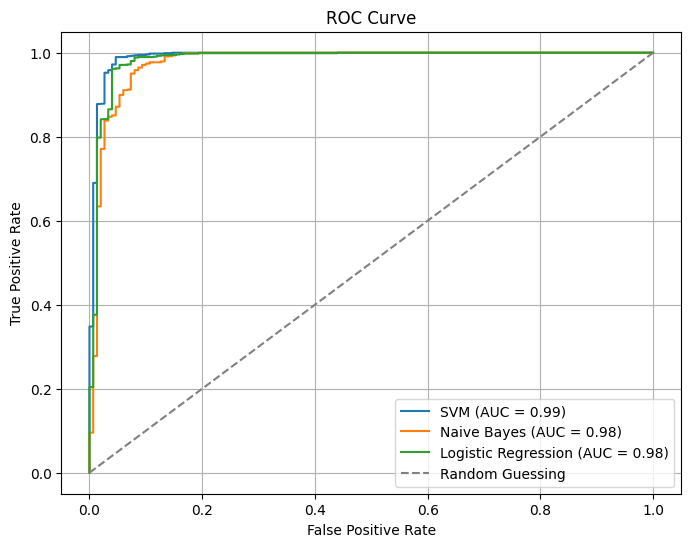

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

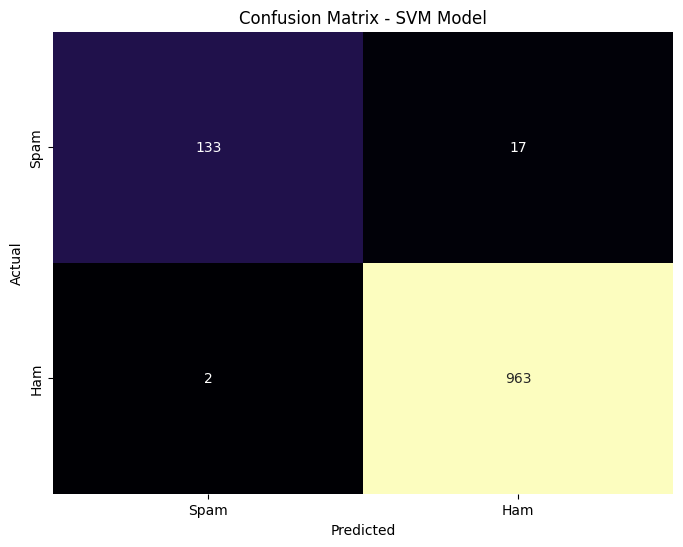

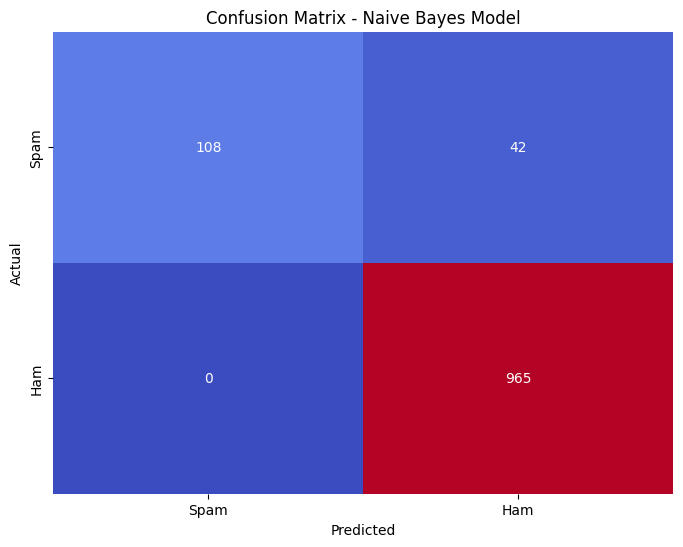

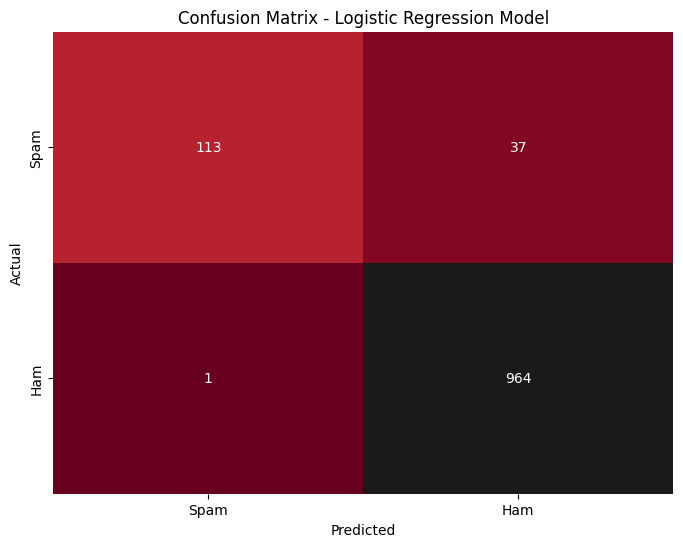

In [ ]:
cm_nb = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()

# Plot confusion matrix for Naive Bayes model
cm_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Model')
plt.show()

# Plot confusion matrix for Logistic Regression model
cm_nb = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='RdGy', cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()